## 1. Significant earthquakes since 2150 B.C.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read earthquakes-2021-10-24_21-24-20_+0800.tsv as Sig_Eqs
Sig_Eqs = pd.read_table('earthquakes-2021-10-24_21-24-20_+0800.tsv',sep='\t') #I get inspired from https://blog.csdn.net/qq_18351157/article/details/104749945

#Verify all columns are included
print(Sig_Eqs.shape)
Len = len(Sig_Eqs) # 获取下载的原始数据的长度

(6273, 48)


#### 1.1 Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.

In [3]:
#Sig_Eqs.head() #Preview the data,发现序号为0行是空行，决定去除
if len(Sig_Eqs) == Len: #下载的原始数据包括一列空行，和6272个记录的数据，此条件防止第二次启动本cell时误删掉需要的数据
    Sig_Eqs = Sig_Eqs.drop(index=[0]) #去除第0行空行
    Sig_Eqs.reset_index(drop=True, inplace=True)

In [4]:
Sig_Eqs.head(10000)

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,-1566.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,NaN,2021.0,9.0,21.0,23.0,15.0,53.0,NaN,NaN,AUSTRALIA,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,46.0,1.0
6268,NaN,2021.0,9.0,27.0,6.0,17.0,22.0,NaN,NaN,GREECE,...,NaN,NaN,20.0,1.0,NaN,3.0,772.0,3.0,NaN,NaN
6269,NaN,2021.0,10.0,6.0,22.0,1.0,8.0,NaN,NaN,PAKISTAN,...,NaN,NaN,229.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0
6270,NaN,2021.0,10.0,12.0,9.0,24.0,3.0,5817.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [5]:
#Compute the total number of deaths since 2150 B.C in each country
Total_death_number_each_country = Sig_Eqs.groupby('Country')['Total Deaths'].sum()

#Get the top ten countries along with the total number of deaths
Top_ten_total_death_number_country = Total_death_number_each_country.sort_values(ascending=False)[:10]

# Print the required result
print(Top_ten_total_death_number_country)

Country
CHINA         2041784.0
TURKEY         867454.0
IRAN           758638.0
SYRIA          437700.0
ITALY          359064.0
JAPAN          355137.0
HAITI          323770.0
AZERBAIJAN     310119.0
INDONESIA      280351.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64


#### 1.2 Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2017.0    32
 2018.0    28
 2019.0    27
 2020.0    15
 2021.0    18
Name: Year, Length: 530, dtype: int64


Year
1922.0    13
1923.0    18
1924.0    10
1925.0    13
1926.0     8
          ..
2017.0    32
2018.0    28
2019.0    27
2020.0    15
2021.0    18
Name: Year, Length: 100, dtype: int64

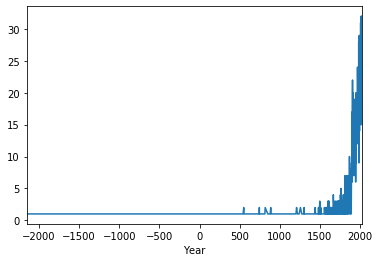

In [15]:
# Compute the total number of earthquakes with magnitude larger than 6.0
Total_mag_largethan_6_earthquakes_number_each_year = Sig_Eqs[Sig_Eqs['Mag'] > 6.0].groupby('Year')['Year'].count()
print(Total_mag_largethan_6_earthquakes_number_each_year) # 打印结果

#绘制结果
Total_mag_largethan_6_earthquakes_number_each_year.plot()
Total_mag_largethan_6_earthquakes_number_each_year.tail(100)
#通过图中可以看出全球地震震级大于6级以上的地震总次数呈现一个先总体不变，然后在1500年左右开始显著上升的趋势，尤其近百年来的次数显著大于过去。
#我猜测这种现象出现的一个主要原因是随着时间的推进监测地震的技术手段的提升，古代的数据可能只有造成重大影响的地震才有可能被记录下来，因此存在数据缺失等问题。

#### 1.3 Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [30]:
CountEq = Sig_Eqs.groupby('Country')['Year'].count()['CHINA']
# CountEq.sort_values(ascending=False)[:10]
#Temp = Sig_Eqs.groupby('Country')['Mag'].max()
#print(Temp)
print(CountEq)
LargestEq = Sig_Eqs.groupby('Country')['Mag'].max()['CHINA']
print(LargestEq)
year = Sig_Eqs[Sig_Eqs['Mag']==LargestEq]['Year']
print(type(year))
#year = Sig_Eqs[Sig_Eqs['Mag']==LargestEq][Sig_Eqs['Country']=='CHINA']['Year']
#print(year)

610
8.5
<class 'pandas.core.series.Series'>


In [39]:
def CountEq_LargestEq(Sig_Eqs, Country):
    CountEq = Sig_Eqs.groupby('Country')['Year'].count()[Country]#Get the total number of earthquakes since 2150 B.C. in a given country 
    LargestEq = Sig_Eqs.groupby('Country')['Mag'].max()[Country] #Get the Largest earthquake's magitude since 2150 B.C. in a given country 
    year = Sig_Eqs[Sig_Eqs['Mag']==LargestEq][Sig_Eqs['Country']==Country]['Year']
    print(year)
    return CountEq
print(CountEq_LargestEq(Sig_Eqs, 'CHINA'))

972    1668.0
Name: Year, dtype: float64
610


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
